Hiss → broadband noise

Hum → strong low-frequency line

Clipping → waveform flattening

Distortion → compressed peaks

Echo → repeated energy

Lowpass → high-freq attenuation

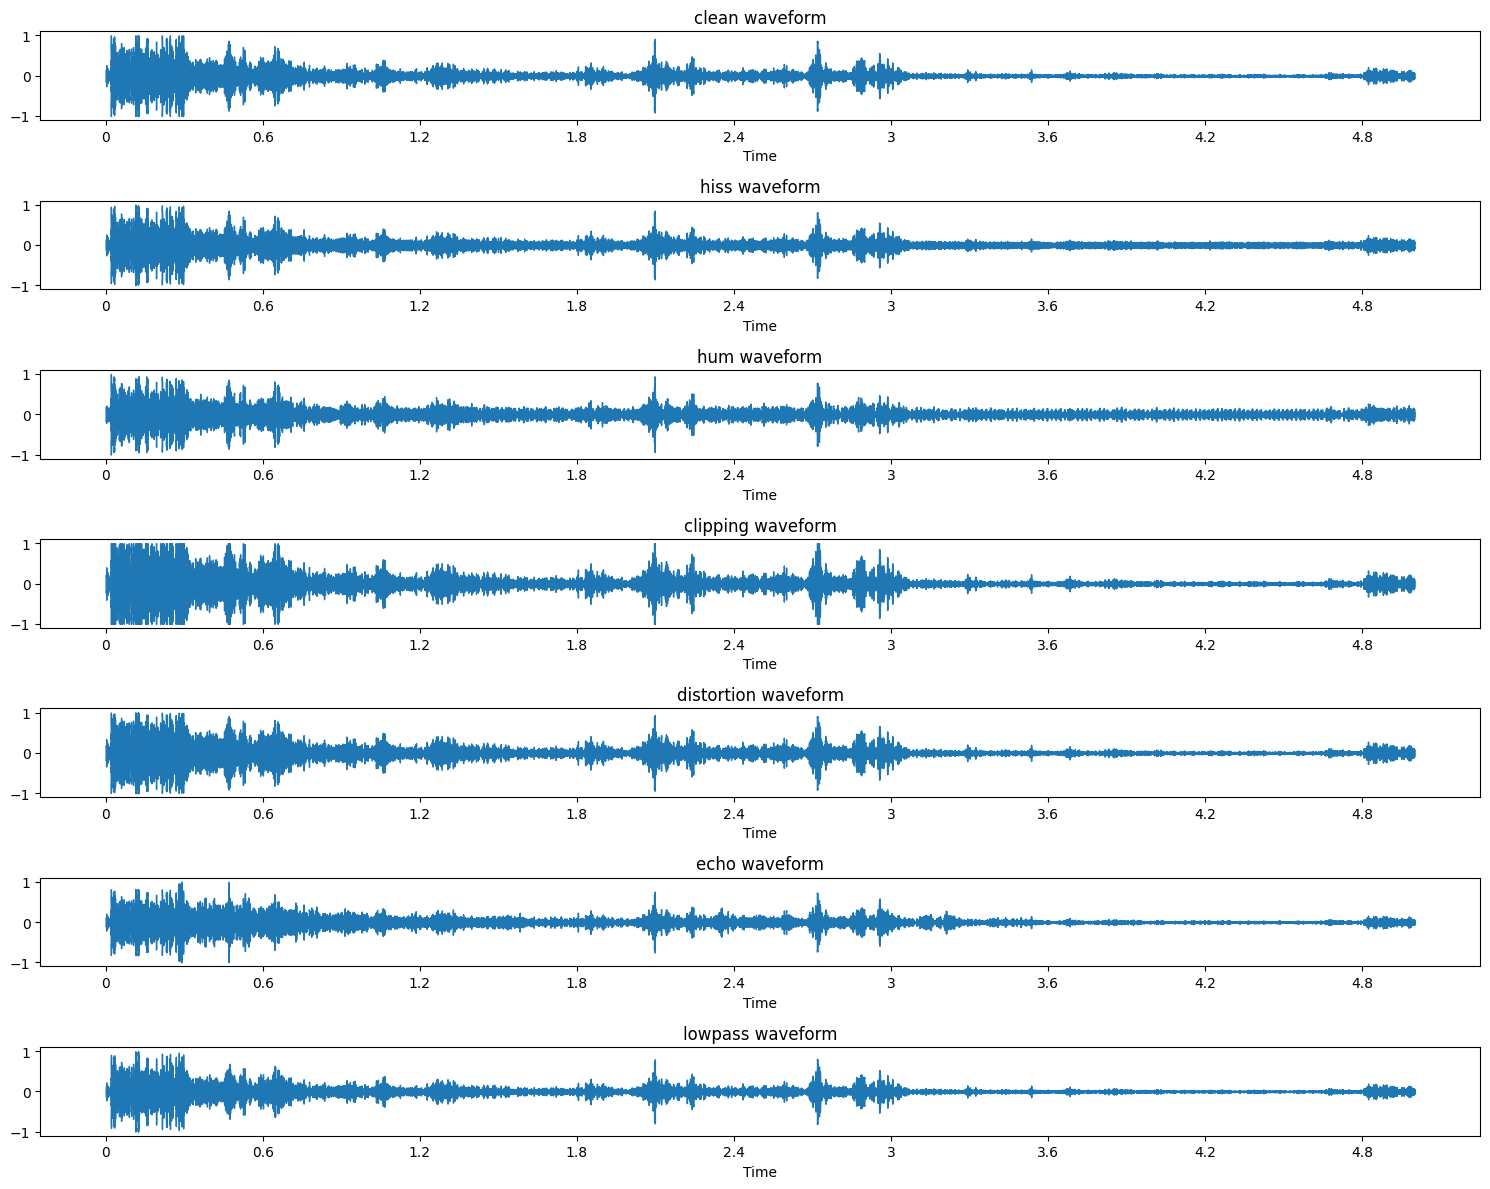

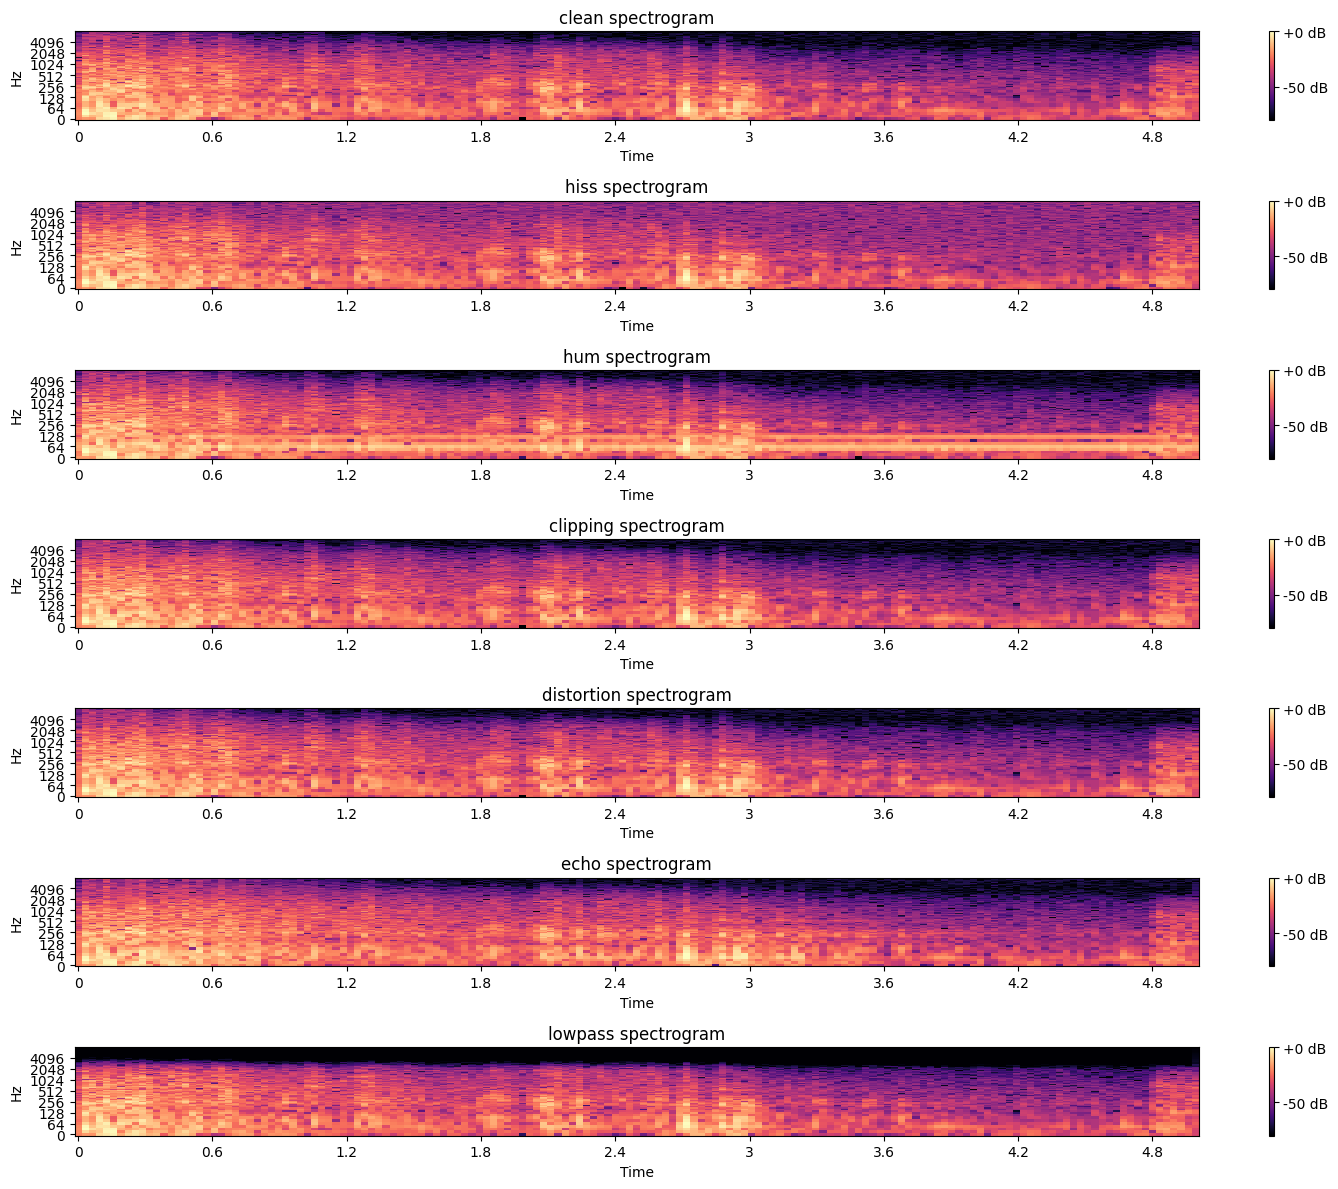

In [1]:
# Import libraries
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# Paths
# --------------------------
audio_dir = "ESC50ArtifactTest"  # folder where your audio files are
file_base = "1-23222-A-19"

artifacts = ["clean", "hiss", "hum", "clipping", "distortion", "echo", "lowpass"]

# --------------------------
# Load all audios
# --------------------------
audio_dict = {}
sr = 16000  # target sample rate

for artifact in artifacts:
    file_path = os.path.join(audio_dir, f"{file_base}_{artifact}.wav")
    y, sr = librosa.load(file_path, sr=sr)
    audio_dict[artifact] = y

# --------------------------
# Plot waveforms
# --------------------------
plt.figure(figsize=(15, 12))
for i, artifact in enumerate(artifacts):
    plt.subplot(len(artifacts), 1, i+1)
    librosa.display.waveshow(audio_dict[artifact], sr=sr)
    plt.title(f"{artifact} waveform")
plt.tight_layout()
plt.show()

# --------------------------
# Plot spectrograms (log-scale)
# --------------------------
plt.figure(figsize=(15, 12))
for i, artifact in enumerate(artifacts):
    plt.subplot(len(artifacts), 1, i+1)
    # compute STFT
    D = np.abs(librosa.stft(audio_dict[artifact], n_fft=1024, hop_length=512))
    # convert to dB
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{artifact} spectrogram")
plt.tight_layout()
plt.show()
